# Gradient Descent

In this exercice, you will create the necessary functions to go through the steps of a single Gradient Descent Epoch. You will then combine the necessary functions and create a loop through the entire Gradient Descent procedure.

## 1. Data Exploration

👇 Import the dataset located in the folder

In [22]:
import pandas as pd

data = pd.read_csv("data.csv")

data.head()

,alim_ssgrp_nom_eng,alim_nom_eng,Phosphorus (mg/100g),Protein (g/100g),Zinc (mg/100g)
0,pasta. rice and grains,Durum wheat pre-cooked. whole grain. cooked. u...,116.0,5.25,0.48
1,pasta. rice and grains,Asian noodles. plain. cooked. unsalted,43.0,3.50,0.19
2,pasta. rice and grains,Rice. brown. cooked. unsalted,120.0,3.21,0.62
3,pasta. rice and grains,Rice. cooked. unsalted,35.0,2.92,0.26
4,pasta. rice and grains,Rice. parboiled. cooked. unsalted,35.0,2.95,0.10


👇 Check for missing values

In [23]:
data.isna().sum()

alim_ssgrp_nom_eng      0
alim_nom_eng            0
Phosphorus (mg/100g)    0
Protein (g/100g)        0
Zinc (mg/100g)          0
dtype: int64

👇 Visualize the relation between the variables `Phosphorus (mg/100g)` and `Zinc (mg/100g)`.

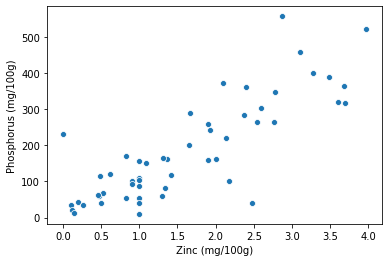

In [38]:
import seaborn as sns

sns.scatterplot('Zinc (mg/100g)','Phosphorus (mg/100g)', data=data)

The visualization should hint at a somewhat Linear relationship between the variables. Let's use Gradient Descent to find the line of best fit between them!

## 2. Data Preprocessing

👇 Before you start, scale the two features. This will allow the Gradient Descent to be more efficient and converge faster. Add the scaled features as new columns in the dataframe.

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(data[['Zinc (mg/100g)','Phosphorus (mg/100g)']])

data['zinc_scaled'], data['phosphorus_scaled'] = scaler.transform(data[['Zinc (mg/100g)','Phosphorus (mg/100g)']]).T

data.head()

,alim_ssgrp_nom_eng,alim_nom_eng,Phosphorus (mg/100g),Protein (g/100g),Zinc (mg/100g),zinc_scaled,phosphorus_scaled
0,pasta. rice and grains,Durum wheat pre-cooked. whole grain. cooked. u...,116.0,5.25,0.48,0.120907,0.193784
1,pasta. rice and grains,Asian noodles. plain. cooked. unsalted,43.0,3.50,0.19,0.047859,0.060329
2,pasta. rice and grains,Rice. brown. cooked. unsalted,120.0,3.21,0.62,0.156171,0.201097
3,pasta. rice and grains,Rice. cooked. unsalted,35.0,2.92,0.26,0.065491,0.045704
4,pasta. rice and grains,Rice. parboiled. cooked. unsalted,35.0,2.95,0.10,0.025189,0.045704


👇 Set the variables x and y as zinc and and phosphorus respectively (their scaled version)

In [26]:
x = data['zinc_scaled']
y = data['phosphorus_scaled']

## 3. Gradient Descent Epoch 

In this section of the exercice, you will define the key functions of a Gradient Descent.

### Hypothesis Function

$$
\hat{y} =  a x + b
$$

👇 Define the hypothesis function of a Linear Regression. Let `a` be the slope and `b` the intercept.


In [27]:
def hypothesis(x,a,b):
    y_pred = a*x + b
    return y_pred

❓ What would be your predicted amount of phosphorus if:
- zinc = 0.1
- a = 1
- b = 1

Use your hypothesis function to compute the answer. 

In [28]:
hypothesis(0.1,1,1)

1.1

⚠️ If the answer is not 1.1, something is wrong with your function. Fix it before moving on!

### Loss Function

$$
Least\ Squares\ Loss = \sum_{i=0}^n (y^{(i)} - \hat{y}^{(i)} )^2
$$

👇 Define the Least Squares Loss Function for the above created Hypothesis Function.



<details>
<summary>💡 Hint</summary>
You must use the Hypothesis Function within the Loss function to compute the predictions at given parameter values.
</details>



In [55]:
import numpy as np

def loss(x,y,a,b):
    y_pred = hypothesis(x,a,b)
    loss = np.sum((y-y_pred) ** 2)
    return loss

❓ What would be the total Loss if:
- a = 1 
- b = 1

In [56]:
loss(x,y,1,1)

63.868506986115456

⚠️ You should be getting 63.86. If not, something is wrong with your function. Fix it before moving on!

### Derivatives

$$
\frac{d\ SSR}{d\ slope}= \sum_{i=0}^n -2(y^{(i)} - \hat{y}^{(i)} )\times x
$$

$$
\frac{d\ SSR}{d\ intercept}= \sum_{i=0}^n -2(y^{(i)} - \hat{y}^{(i)} ) 
$$

👇 Define a function to compute the partial derivatives of the Loss Function for each parameter `a` and `b` at given points.


<details>
<summary>💡 Hint</summary>
Again, you must use the Hypothesis Function within to compute the predictions at given points.
</details>

In [57]:
def derivatives(x,y,a,b):
    y_pred = hypothesis(x,a,b)
    derivative_a = np.sum(-2*(y-y_pred)*x)
    derivative_b = np.sum(-2*(y-y_pred))
    return derivative_a, derivative_b

❓ Using your function, what would be the partial derivatives of each parameter if:
- a = 1
- b = 1

In [58]:
derivatives(x,y,1,1)

(48.459065809109006, 115.17923733301406)

⚠️ You should be getting 48.45 and  115.17. If not, fix your function!

### Step Sizes

$$
step\ size = derivative \times learning\ rate
$$

👇 Define a function that calculates the step sizes for each parameter according to their derivatives. Fix the Learning Rate at 0.01.

In [59]:
def steps(derivative_a,derivative_b,learning_rate = 0.01):
    step_a = derivative_a*learning_rate
    step_b = derivative_b*learning_rate
    return step_a, step_b

❓ What would be the steps to take for the derivatives computed in part 5. of the exercice?

In [60]:
derivative_a, derivative_b = derivatives(x,y,1,1)

steps(derivative_a,derivative_b,learning_rate = 0.01)

(0.4845906580910901, 1.1517923733301405)

⚠️ The steps should be 0.48 and 1.15

### Parameter updates

$$
updated\ parameter = old\ parameter\ value - step\ size
$$

👇 Define a function that computes the updated parameter values from the old parameter values and the step sizes.

In [61]:
def parameter_update(a, step_a, b, step_b):
    updated_a = a - step_a
    updated_b = b - step_b
    return updated_a , updated_b

### Gradient Descent Epoch

👇 Using the functions you just created, compute the updated parameters at the end of the first Epoch, had you started with parameters:
- a = 1
- b = 1

In [106]:
a = 1
b = 1

derivative_a, derivative_b = derivatives(x,y,a,b)

step_a, step_b = steps(derivative_a,derivative_b,learning_rate = 0.01)

updated_a, updated_b = parameter_update(a,step_a,b,step_b)

print(updated_a)
print(updated_b)

0.5154093419089099
-0.1517923733301405


⚠️ You should be getting the following values:
   - updated_a = 0.51
   - updated_b = -0.15

## 4. Gradient Descent

👇 Now that you have the necessary functions for a Gradient Descent, loop through epochs until convergence.

- Initialize parameters `a = 1` and  `b = 0`
- Consider convergence to be **150 epochs**
- Don't forget to start each new epoch with the updated parameters
- Append the Loss at each epoch to a list called `loss_history`

In [107]:
# Initialize a and b
a = 1
b = 0
loss_history = []

# Loop through steps to perform Gradient Descent
for epoch in range(150):
    
    # Compute Loss at each Epoch and append to loss_history
    loss_epoch = loss(x,y,a,b)
    loss_history.append(loss_epoch)
    
    # Compute the Derivates 
    derivative_a, derivative_b = derivatives(x,y,a,b)
    
    # Compute Steps
    step_a, step_b = steps(derivative_a,derivative_b,learning_rate = 0.01)
    
    # Compute updated parameters
    updated_a, updated_b = parameter_update(a,step_a,b,step_b)
    
    # Set updated parameters for new epoch
    a = updated_a
    b = updated_b

❓ What are the parameter values for `a` and `b` at the end of the 150 epochs?

In [108]:
print(a,b)

0.768843345199985 0.007015051856860805


You should be getting 0.76 and -0.007

👇 Plot the Loss history

Text(0, 0.5, 'Loss')

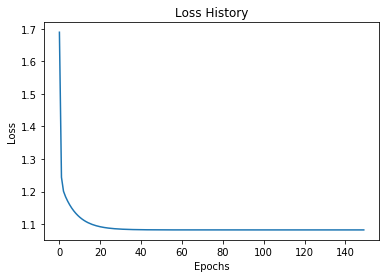

In [109]:
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Epochs")
plt.ylabel("Loss")

👇 Plot the line of best fit through Zinc and Phosphorus using the parameters of your Gradient Descent.

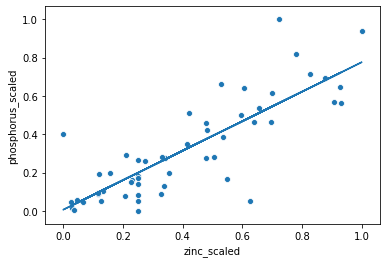

In [111]:
import matplotlib.pyplot as plt

sns.scatterplot(data['zinc_scaled'],data['phosphorus_scaled'])

plt.plot(x, hypothesis(x,a,b))

## 7. With Sklearn...

👇 Using Sklearn, train a Linear Regression model on the same data. Compare its parameters to the ones computed by your Gradient Descent.

In [112]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(data[['zinc_scaled']], data['phosphorus_scaled'])

slope, intercept = model.coef_, model.intercept_ 

print(slope,intercept)

[0.76883717] 0.007017720201062283


They should be almost identical!

### ⚠️ Please, push your exercice when you are done 🙃

# 🏁